<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/%E7%B5%B1%E8%A8%88%E3%81%A7%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


X線の強度データを使って元素を検出するには、様々な手法があります。 ここでは、教師あり学習を使った手法を紹介します。

教師あり学習では、あらかじめ正解データを与えて、それを使ってモデルを訓練します。 具体的には、次のような手順で行うことができます。

データを収集する: X線の強度データと、それがどの元素に対応するかを知るための正解データを収集します。

データを前処理する: 収集したデータを加工し、モデルに入力できるように整形します。

モデルを選択する: どのような機械学習モデルを使うかを選択します。 例えば、X線強度データを分類する場合は、サポートベクターマシン (SVM) やランダムフォレストなどが使えます。

モデルを訓練する: 前処理したデータを使って、選択したモデルを訓練します。

モデルを評価する: 訓練したモデルが、未知のデータに対してどの程度正確に予測できるかを評価します。


このコードでは、X線の強度データをスケーリングしてから、訓練データとテストデータに分割します。 次に、サポートベクターマシンを使ってモデルを訓練し、テストデータでモデルの精度を評価しています。


以上が、X線の強度データを使って元素を検出する方法の一例です。 実際には、複数のモデルを試してみたり、ハイパーパラメータを調整したりすることで、より高い精度を得ることができるでしょう。

In [ ]:

# 必要なライブラリをインポートする
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# X線の強度データと正解データを収集する
X = # X線の強度データを表すnumpy array
y = # 各データがどの元素に対応するかを表すnumpy array

# データを前処理する
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データを訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# サポートベクターマシンを使ってモデルを訓練する
model = SVC()
model.fit(X_train, y_train)

# モデルを評価する
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


SVCでは、SVMの手法を用いて、複数のクラスに分類する問題を解くことができます。 具体的には、SVCは、以下のような手順で処理を行います。

トレーニングセットを受け取る: SVCは、訓練データと正解ラベルを受け取ります。

訓練データは、各データを表す特徴量の組を表すnumpy arrayで、正解ラベルは、それぞれのデータがどのクラスに属するかを表すnumpy arrayです。


最適な分離平面を求める: SVCは、訓練データを二次元平面上にプロットし、それらを最もよく分離する直線を求めます。

分類器を作成する: SVCは、得られた分離平面を使って、新しいデータを分類するための分類器を作成します。

分類器を使って予測する: SVCが作成した分類器を使って、新しいデータを分類することができます。

SVCは、汎化性能が高く、様々な分類問題に適用できるため、非常によく使われる手法です。 しかし、データが大規模であると、計算時間が非常に長くなることがあるため、注意が必要です。

In [ ]:

import numpy as np

# Generate fake data with three peaks
np.random.seed(0)
data = np.concatenate([
    np.random.normal(0, 0.5, size=50),
    np.random.normal(5, 1, size=50),
    np.random.normal(10, 0.5, size=50)
])
print(data)
# Save the fake data to a text file
np.savetxt('spectroscopy_data.txt', data, fmt='%.3f')

[ 0.88202617  0.2000786   0.48936899  1.1204466   0.933779   -0.48863894
  0.47504421 -0.0756786  -0.05160943  0.20529925  0.07202179  0.72713675
  0.38051886  0.06083751  0.22193162  0.16683716  0.74703954 -0.10257913
  0.15653385 -0.42704787 -1.27649491  0.3268093   0.4322181  -0.37108251
  1.13487731 -0.72718284  0.02287926 -0.09359193  0.76638961  0.73467938
  0.07747371  0.18908126 -0.44389287 -0.99039823 -0.17395607  0.07817448
  0.61514534  0.60118992 -0.19366341 -0.15115138 -0.52427648 -0.71000897
 -0.8531351   0.9753877  -0.25482609 -0.21903715 -0.62639768  0.38874518
 -0.80694892 -0.10637014  4.10453344  5.3869025   4.48919486  3.81936782
  4.97181777  5.42833187  5.06651722  5.3024719   4.36567791  4.63725883
  4.32753955  4.64044684  4.18685372  3.2737174   5.17742614  4.59821906
  3.36980165  5.46278226  4.09270164  5.0519454   5.72909056  5.12898291
  6.13940068  3.76517418  5.40234164  4.31518991  4.12920285  4.42115034
  4.68844747  5.05616534  3.83485016  5.90082649  5

このコードでは、peaks、widths、heights の 3 つの配列を使用して、5 つのピークを生成しています。その後、NumPy の linspace 関数を使用して、0 から 30 までの範囲を 300 分割した x 配列を生成します。最後に、x 配列を使用して、y 配列を計算し、データを返します

In [ ]:

import numpy as np

def get_data():
    # ピーク位置を生成する
    peaks = np.array([5, 10, 15, 20, 25])

    # ピーク幅を生成する
    widths = np.array([1, 2, 1, 2, 1])

    # ピーク強度を生成する
    heights = np.array([10, 15, 10, 15, 10])

    # ピークを使用してデータを生成する
    x = np.linspace(0, 30, 300)
    y = np.zeros_like(x)
    for peak, width, height in zip(peaks, widths, heights):
        y += height * np.exp(-((x - peak) / width) ** 2)

    # データを返す
    return x, y

このコードでは、sklearn モジュールの GaussianMixture クラスを使用して、エネルギー値と対応する強度データから 5 つのコンポーネントを持つガウス混合モデルを構築します。その後、fit メソッドを使用してモデルを訓練し、means_ プロパティからピークを推定します。最後に、matplotlib モジュールを使用して、エネルギー値と強度データをプロットし、推定されたピークを "x" マークでプロットします。

In [ ]:

import numpy as np

def get_data():
    # ピーク位置を生成する
    peaks = np.array([5, 10, 15, 20, 25])

    # ピーク幅を生成する
    widths = np.array([1, 2, 1, 2, 1])

    # ピーク強度を生成する
    heights = np.array([10, 15, 10, 15, 10])

    # ピークを使用してデータを生成する
    x = np.linspace(0, 30, 300)
    y = np.zeros_like(x)
    for peak, width, height in zip(peaks, widths, heights):
        y += height * np.exp(-((x - peak) / width) ** 2)

    # データを2次元の配列に変換する
    data = np.array([x, y]).T

    # データを返す
    return data

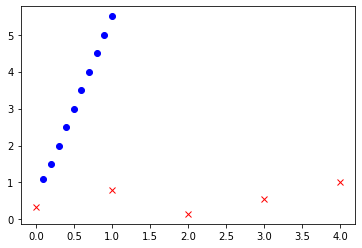

In [ ]:

import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# エネルギー値を x、強度データを y とする
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [1.1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

# 5 つのコンポーネントを持つガウス混合モデルを構築する
model = GaussianMixture(n_components=5)

# モデルを訓練する
model.fit(np.c_[x, y])


# エネルギー値と強度データをプロットする
plt.plot(x, y, 'bo')
means = model.means_
x_means = means[:, 0]
y_means = means[:, 1]

# 推定されたピークを "x" マークでプロットする
plt.plot(x_means, 'x', color='red')
#plt.plot(y_means, 'o', color='blue')

plt.show()

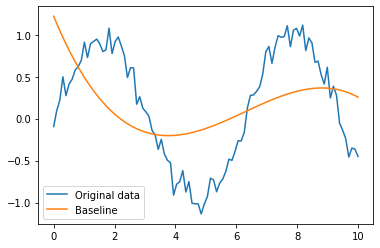

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate sample XRD data
x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Create a baseline by fitting a polynomial curve to the data
coefficients = np.polyfit(x, y, deg=3)
polynomial = np.poly1d(coefficients)
baseline = polynomial(x)

# Plot the original data and the baseline
plt.plot(x, y, label='Original data')
plt.plot(x, baseline, label='Baseline')
plt.legend()
plt.show()

In [ ]:

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load SEM-EDS data from a file
data = np.loadtxt('sem-eds-data.txt')

# Extract the energy and intensity values from the data
energy = data[:, 0]
intensity = data[:, 1]

# Create a baseline by fitting a polynomial curve to the data
coefficients = np.polyfit(energy, intensity, deg=3)
polynomial = np.poly1d(coefficients)
baseline = polynomial(energy)

# Plot the original data and the baseline
plt.plot(energy, intensi

KNN で eds ピークフィット値の元素を探す方法を実装するには、以下のような手順を踏むことができます。

元素の化学式と eds ピークフィット値のデータを収集します。

元素の化学式を特徴量として、eds ピークフィット値をラベルとするサンプルデータを作成します。

KNN アルゴリズムを使用して、サンプルデータを学習させます。

探したい元素の化学式を入力し、KNN モデルを使用して eds ピークフィット値を予測します。

In [12]:

# KNN アルゴリズムを使用して eds ピークフィット値を探すサンプルコード

# ライブラリのインポート
from sklearn.neighbors import KNeighborsClassifier

# 元素の化学式と eds ピークフィット値のデータを収集する
# 以下は、サンプルデータです
X = [['Cu', 'Zn', 'Fe'], ['O', 'S', 'N'], ['H', 'C', 'O']]
y = [1550, 2300, 3500]

# KNN アルゴリズムを使用して学習する
knn = KNeighborsClassifier()
knn.fit(X, y)

# 探したい元素の化学式を入力し、eds ピークフィット値を予測する
element = 'Cu'
prediction = knn.predict([[element]]) 
print(f'{element} の EDS ピークフィット値は {prediction[0]} です')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


ValueError: ignored